In [18]:
import pandas as pd
import os
import matplotlib.pyplot as plt

TIMESTAMP = '1643715595.2789686'
DATA_DIRECTORY = '/run/media/ture/Backup Plus/data/2022-02-01_server_training/'

perf_data = pd.read_csv(os.path.join(DATA_DIRECTORY, f'{TIMESTAMP}_performance_stats.csv'))
perf_data['timestamp'] = pd.to_datetime(perf_data['timestamp'])
perf_data.head()

,iteration,timestamp,iteration_duration,training_duration,examples_read_from_queue,length_experience_buffer
0,1,1970-01-01 00:00:01.643718217,2218.501398,472.578161,10,152746
1,2,1970-01-01 00:00:01.643719899,1681.933647,924.498789,65,299381
2,3,1970-01-01 00:00:01.643721934,2035.905448,1286.736265,51,416687
3,4,1970-01-01 00:00:01.643724400,2465.393574,1686.951125,57,547307
4,5,1970-01-01 00:00:01.643728102,3702.260512,2208.053718,74,715868


<AxesSubplot:xlabel='iteration'>

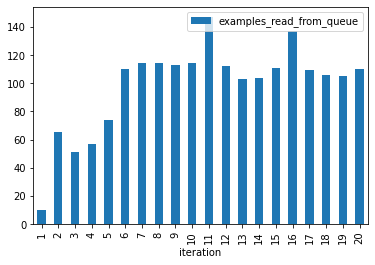

In [19]:
perf_data.plot.bar(x='iteration', y='examples_read_from_queue')

<AxesSubplot:xlabel='iteration'>

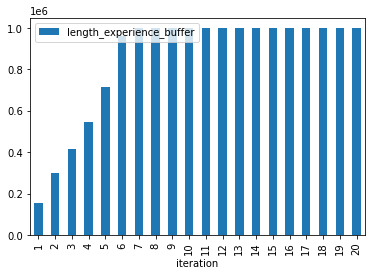

In [20]:
perf_data.plot.bar(x='iteration', y='length_experience_buffer')

<AxesSubplot:xlabel='iteration'>

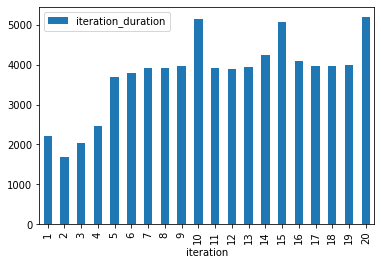

In [21]:
perf_data.plot.bar(x='iteration', y='iteration_duration')

In [22]:
rndm_data = pd.read_csv(os.path.join(DATA_DIRECTORY, f'{TIMESTAMP}_random_player_game_stats.csv'))
rndm_data['timestamp'] = pd.to_datetime(perf_data['timestamp'])
rndm_data.set_index('iteration')
rndm_data.head()

,iteration,timestamp,wins,losses,draws,nnet_cumul_rewards,random_cumul_rewards
0,1,1970-01-01 00:00:01.643718217,16.0,0.0,0.0,15.166667,-15.166667
1,5,1970-01-01 00:00:01.643719899,16.0,0.0,0.0,16.000000,-16.000000
2,10,1970-01-01 00:00:01.643721934,16.0,0.0,0.0,15.833333,-15.833333
3,15,1970-01-01 00:00:01.643724400,16.0,0.0,0.0,15.666667,-15.666667
4,20,1970-01-01 00:00:01.643728102,16.0,0.0,0.0,16.000000,-16.000000


In [23]:
hrstc_data = pd.read_csv(os.path.join(DATA_DIRECTORY, f'{TIMESTAMP}_heuristic_player_game_stats.csv'))
hrstc_data['timestamp'] = pd.to_datetime(perf_data['timestamp'])
hrstc_data.set_index('iteration')
hrstc_data.head()

,iteration,timestamp,wins,losses,draws,nnet_cumul_rewards,random_cumul_rewards
0,1,1970-01-01 00:00:01.643718217,0.0,8.0,8.0,-8.000000,8.000000
1,5,1970-01-01 00:00:01.643719899,0.0,16.0,0.0,-9.333333,9.333333
2,10,1970-01-01 00:00:01.643721934,0.0,7.0,9.0,-6.000000,6.000000
3,15,1970-01-01 00:00:01.643724400,0.0,8.0,8.0,-1.333333,1.333333
4,20,1970-01-01 00:00:01.643728102,0.0,8.0,8.0,-1.333333,1.333333


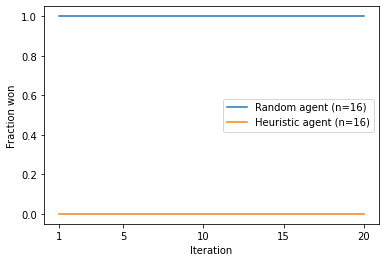

In [24]:
rndm_n_games = int(rndm_data['wins'][0] + rndm_data['losses'][0] + rndm_data['draws'][0])
hrstc_n_games = int(rndm_data['wins'][0] + rndm_data['losses'][0] + rndm_data['draws'][0])

rndm_fraction_won = rndm_data.apply(lambda row: row['wins'] / rndm_n_games, axis=1).to_list()
hrstc_fraction_won = hrstc_data.apply(lambda row: row['wins'] / hrstc_n_games, axis=1).to_list()

plt.plot(rndm_data['iteration'], rndm_fraction_won,  label=f'Random agent (n={rndm_n_games})')
plt.plot(rndm_data['iteration'], hrstc_fraction_won,  label=f'Heuristic agent (n={hrstc_n_games})')
plt.xticks(rndm_data['iteration'])
plt.xlabel('Iteration')
plt.ylabel(f'Fraction won')
plt.legend()
plt.show()

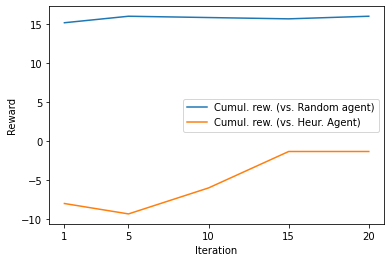

In [25]:
plt.plot(rndm_data['iteration'], rndm_data['nnet_cumul_rewards'],  label=f'Cumul. rew. (vs. Random agent)')
plt.plot(rndm_data['iteration'], hrstc_data['nnet_cumul_rewards'],  label=f'Cumul. rew. (vs. Heur. Agent)')
plt.xticks(rndm_data['iteration'])
plt.xlabel('Iteration')
plt.ylabel(f'Reward')
plt.legend()
plt.show()